<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Logistic Regression

**Breast Cancer Dataset**

**The goal**:

To use these measurements in the dataset to predict if the mass is cancerous.

This dataset is built right into scikit-learn. 

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()


The object returned is an object similar to a Python dictionary. We can see the available keys with the keys method.

In [4]:
print(cancer_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Let’s pull the feature and target data out of the cancer_data object. 

In [6]:
# to see data size. Number of rows and columns.

cancer_data.data.shape

(569, 30)

In [7]:
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We still need to put the target data in this DataFrame which can be found with the 'target' key.

In [8]:
df['target'] = cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
X = df[cancer_data.feature_names].values

y = df['target'].values

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, )


In [12]:
model = LogisticRegression(solver='liblinear')


To avoid the Convergence Warning which means that the model needs more time to find the optimal solution. One option is to increase the number of iterations. Or we can switch to a different solver. 

The solver is the algorithm that the model uses to find the equation of the line. More on it in documentation.

In [13]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_prob = model.predict_proba(X_test)

In [16]:
# simple accuracy score from model class same as accuracy_score from metrics class
model.score(X_test, y_test, )

0.9532163742690059

## Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.9532163742690059
precision: 0.9464285714285714
recall: 0.9814814814814815
f1 score: 0.9636363636363636


In [19]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[ 57,   6],
       [  2, 106]])

**Sensitivity**  and **specificity** 

(recall and the recall of the negative class)


> For our goal the higher the sensitivity the better our model is. We want to minimize the false negative, which would mean we miss a true cancer diagnosis. 


In [20]:
from sklearn.metrics import recall_score

sensitivity_score = recall_score
sensitivity_thrsh_default = sensitivity_score(y_test, y_pred)
print(sensitivity_thrsh_default)


0.9814814814814815


`precision_recall_fscore_support` from sklearn computes precision, recall, F-measure and support for each class. 

In Scikit-learn negative recall is first element and then positive. Same goes for confussion matrix.


In [22]:
from sklearn.metrics import precision_recall_fscore_support

#Compute precision, recall, F-measure and support for each class.
specificity_1 = precision_recall_fscore_support(y_test, y_pred)[1][0]
specificity_1

0.9047619047619048

(0.0, 1.0)

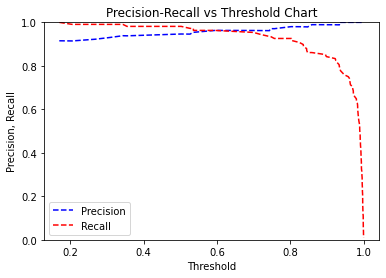

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

#retrieve probability of being 1(in second column of probs_y)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1]) 

  
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


In [26]:
y_pred_2 = model.predict_proba(X_test)[:, 1] > 0.2
sensitivity_thrsh_low = sensitivity_score(y_test, y_pred_2)
print("Sensitivity with threshhold 0.5 is {0}".format(sensitivity_thrsh_default))
print("Sensitivity with threshhold 0.2 is {0}".format(sensitivity_thrsh_low))

Sensitivity with threshhold 0.5 is 0.9814814814814815
Sensitivity with threshhold 0.2 is 0.9907407407407407


In [27]:
cm2 = confusion_matrix(y_test, y_pred_2)
print(cm1)
print(cm2)

[[ 57   6]
 [  2 106]]
[[ 53  10]
 [  1 107]]


By lowering a threshhold to 0.2  we increased sensitivity from 98% to 99% and captured 1 false negative, but increased by 4 more cases the false positive count.

That would be the trade of taking care of one more true cancer patient by potencialy treating 4 patient that actually do not have cancer.

By increasing the sensitivity we see the decrease in the specificity.

In [39]:
specificity_2 = precision_recall_fscore_support(y_test, y_pred_2)[1][0]

print("Specificity with threshhold 0.5 is {0}".format(specificity_1.round(3)))
print("Specificity with threshhold 0.2 is {0}".format(specificity_2.round(3)))


Specificity with threshhold 0.5 is 0.905
Specificity with threshhold 0.2 is 0.841


## ROC curve

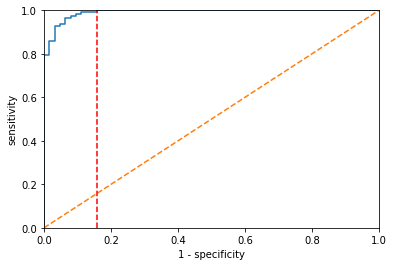

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


y_pred_proba = model.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([1-specificity_2, 1-specificity_2],[0, 1], "r--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

plt.show()
